## 1. 자연언어 처리 기초
### 자연어처리를 위한 데이터 전처리 프로세스
    - 전처리가 필요한 이유
        - 머신러닝 모델(예: RandomForest)이 입력 받을 수 있는 형태(예: 데이터프레임)로 데이터를 만들어야 함.
        - 어휘사전의 단어(컬럼): 입력 데이터의 feature(컬럼)
        - 문서에 출현하는 단어 : 해당 컬럼값으로 표현(count, tfidf)
    - 형태소 분석
    - 어휘사전 구축(벡터화)
        - 문서집합을 사용하여 어휘사전 구축
        - 예) 감성분석에서 15000개의 영화 리뷰 텍스트가 문서 집합
    - 인코딩
        - 분석하려는 문서를 인코딩(단어 = 범주형 데이터) 
        - 범주형 데이터(feature)를 처리하는 과정(OneHotEncoding?)

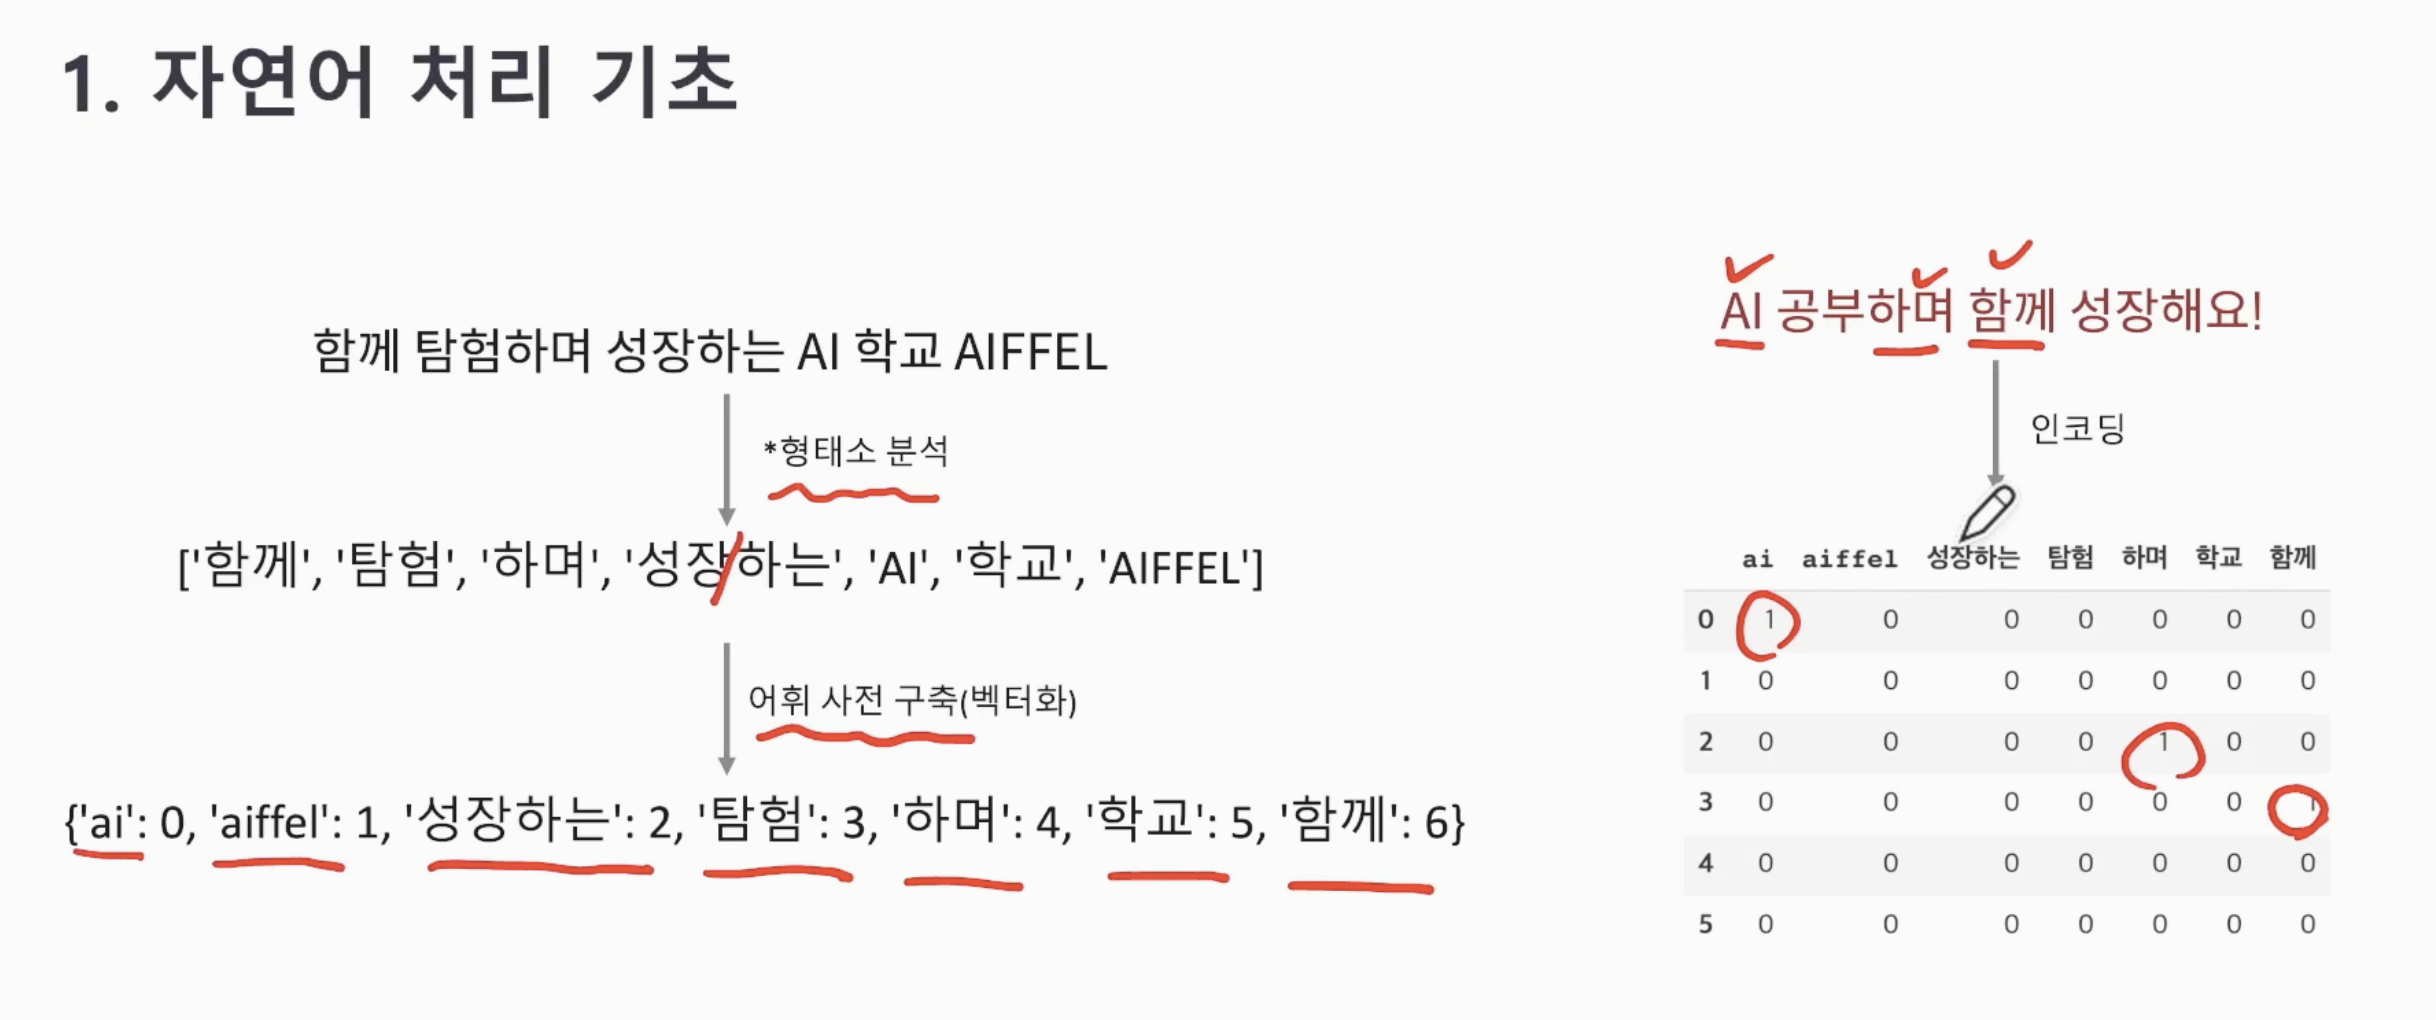

### 어휘 사전 구축(Vector화)
- CountVectorizer
    - 각 문서에서 단어 출현 횟수를 카운팅하는 방법
    - BOW, Bag of Word(단어의 빈도면 고려하면 단어의 순서나 문맥,문법은 무시)
    

- TfidfVectorizer
    - 다른 문서보다 특정 문서에 자주 나타나는 단어에 높은 가중치를 주는 방법
    - TF-IDF(Term Frequency - Inverse Document Frequency)
    - sklearn에서 Vectorizer에서 문서는 하나의 문자열, 문서집합은 문자열의 리스트임

   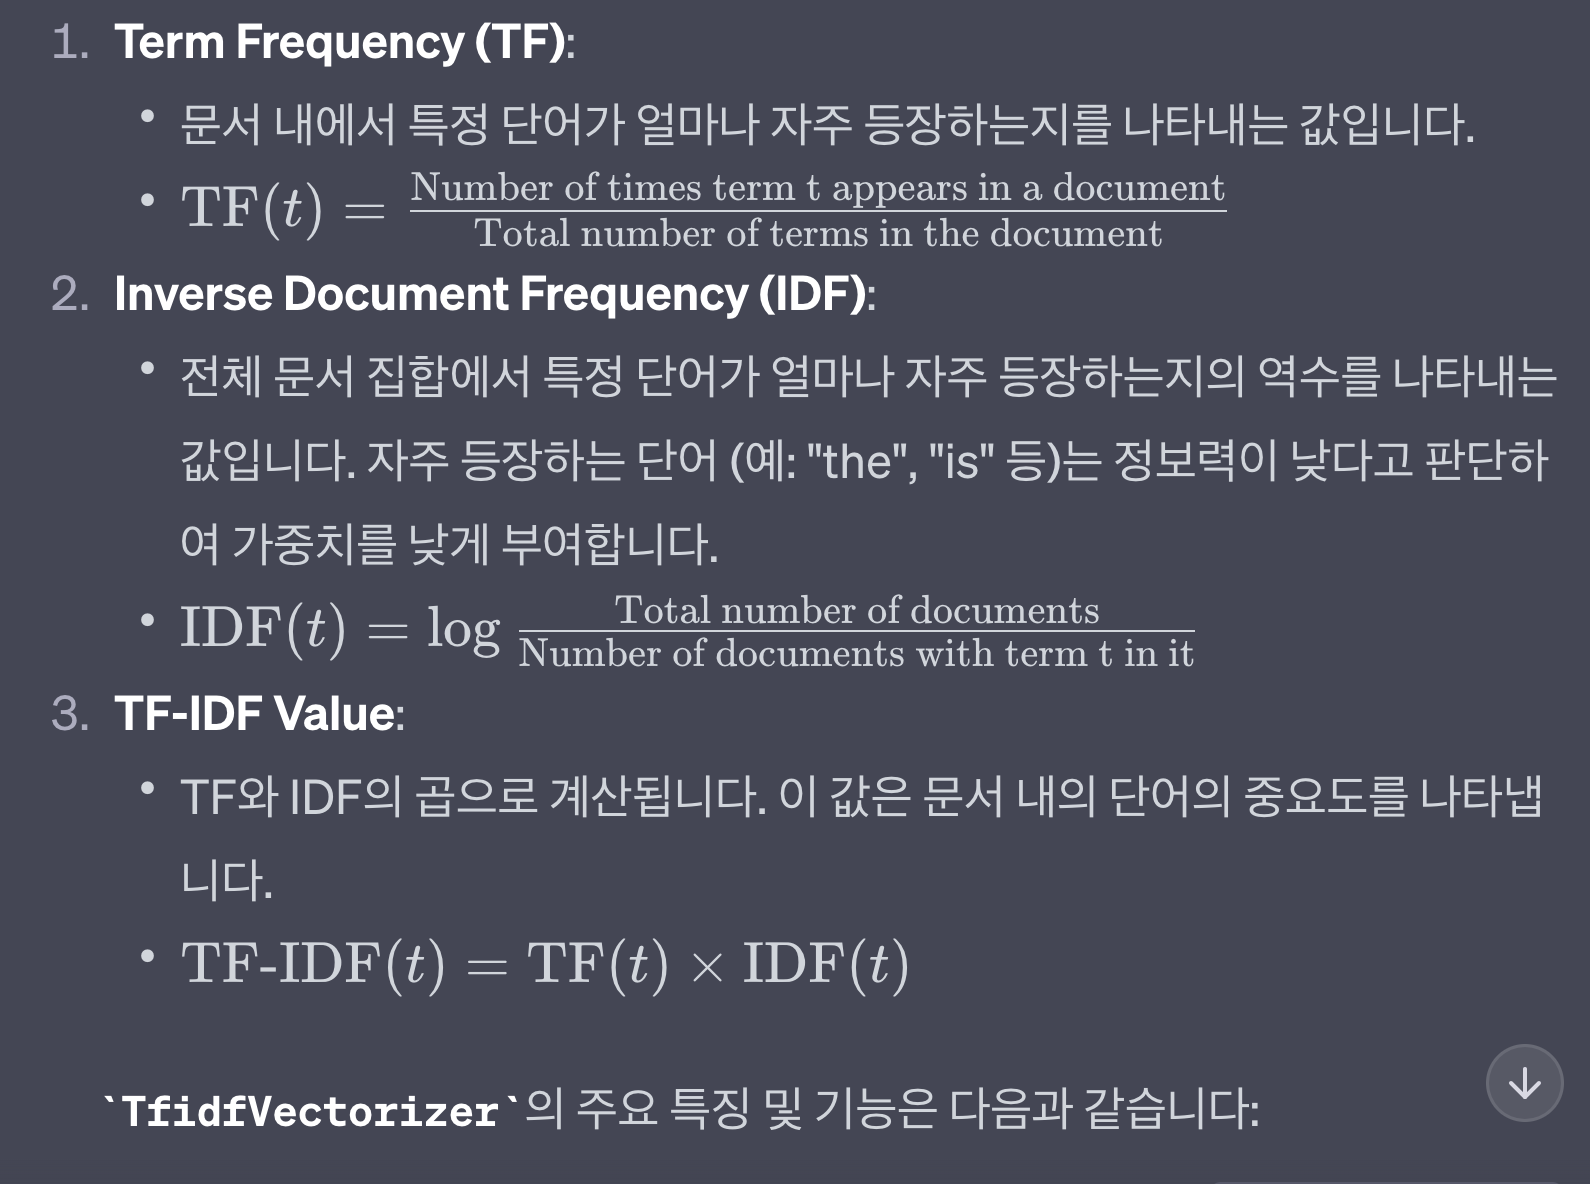
   
- 코드 예
```
### 형태소 분석
# tokenizer 불러오기 & 형태소 분석
tokenizer = Okt()
words = tokenizer.morphs(text)
```
```
### 어휘사전 구축
vect = TfidfVectorizer()
vect.fit(words)
vect.vocabulary_
```
```
### 인코딩
# 학습할 문장 토큰화
test_words = tokenizer.morphs(test)
# 테스트 문장 어휘 사전 기준 인코딩
test_t = vect.transform(test_words)
pd.DataFrame(test_t.toarray(), columns = vect.get_feature_names_out())
```

### [추가 설명 - chatGPT]
#### 1. CountVectorizer

`CountVectorizer`는 scikit-learn 라이브러리에서 제공하는 텍스트 처리 도구로, 텍스트 데이터를 문서-단어 행렬 (Document-Term Matrix, DTM) 형태로 변환하는 데 사용됩니다. 이 행렬은 각 문서에서 각 단어가 몇 번 등장하는지를 나타내는 빈도수를 포함합니다.

`CountVectorizer`의 주요 특징 및 기능은 다음과 같습니다:

1. **토큰화**: 
   - 텍스트 데이터를 개별 단어나 토큰으로 분리합니다.

2. **어휘 사전 구축**: 
   - 모든 문서에서 사용된 모든 단어의 어휘 사전을 구축합니다.

3. **불용어 제거**: 
   - 영어 불용어 제거 기능을 내장하고 있으며, 사용자 정의 불용어 리스트를 제공할 수도 있습니다.

4. **n-gram 범위**: 
   - 연속된 n개의 단어를 하나의 토큰으로 취급하는 n-gram을 지원합니다. 예를 들어, "ngram_range=(1,2)"는 unigram과 bigram을 모두 포함합니다.

5. **문서-단어 행렬**: 
   - 각 문서를 어휘 사전의 단어에 대한 빈도수로 표현한 문서-단어 행렬을 생성합니다. 행렬의 각 행은 개별 문서를 나타내고, 각 열은 어휘 사전의 단어를 나타냅니다. 행렬의 각 원소는 해당 문서에서 해당 단어가 등장하는 빈도수를 나타냅니다.

6. **이진 결과**: 
   - `binary=True` 옵션을 설정하면, 단어의 빈도수 대신 단어의 존재 여부만을 나타내는 이진 값 (0 또는 1)으로 문서-단어 행렬을 생성할 수 있습니다.

`CountVectorizer`는 텍스트 데이터를 분석 및 모델링에 적합한 수치적 형태로 변환하는 데 유용하며, 주로 단순한 빈도 기반의 텍스트 표현을 원할 때 사용됩니다.


#### 2. TfidfVectorizer
   
    
`TfidfVectorizer`는 scikit-learn 라이브러리에서 제공하는 텍스트 처리 도구로, 텍스트 데이터를 수치적인 형태로 변환하는 데 사용됩니다. `TfidfVectorizer`는 TF-IDF (Term Frequency-Inverse Document Frequency) 방식을 사용하여 문서 내의 각 단어의 중요도를 계산하고, 이를 벡터 형태로 표현합니다.

TF-IDF의 주요 개념은 다음과 같습니다:

1. **Term Frequency (TF)**: 
   - 문서 내에서 특정 단어가 얼마나 자주 등장하는지를 나타내는 값입니다.
   - \( \text{TF}(t) = \frac{\text{Number of times term t appears in a document}}{\text{Total number of terms in the document}} \)

2. **Inverse Document Frequency (IDF)**:
   - 전체 문서 집합에서 특정 단어가 얼마나 자주 등장하는지의 역수를 나타내는 값입니다. 자주 등장하는 단어 (예: "the", "is" 등)는 정보력이 낮다고 판단하여 가중치를 낮게 부여합니다.
   - \( \text{IDF}(t) = \log \frac{\text{Total number of documents}}{\text{Number of documents with term t in it}} \)

3. **TF-IDF Value**:
   - TF와 IDF의 곱으로 계산됩니다. 이 값은 문서 내의 단어의 중요도를 나타냅니다.
   - \( \text{TF-IDF}(t) = \text{TF}(t) \times \text{IDF}(t) \)

`TfidfVectorizer`의 주요 특징 및 기능은 다음과 같습니다:

- **토큰화**: 텍스트 데이터를 개별 단어나 토큰으로 분리합니다.
- **어휘 사전 구축**: 모든 문서에서 사용된 모든 단어의 어휘 사전을 구축합니다.
- **불용어 제거**: 영어 불용어 제거 기능을 내장하고 있으며, 사용자 정의 불용어 리스트를 제공할 수도 있습니다.
- **n-gram 범위**: 연속된 n개의 단어를 하나의 토큰으로 취급하는 n-gram을 지원합니다.
- **문서-단어 행렬**: 각 문서를 어휘 사전의 단어에 대한 TF-IDF 값으로 표현한 문서-단어 행렬을 생성합니다.

`TfidfVectorizer`를 사용하면 텍스트 데이터를 분석 및 모델링에 적합한 수치적 형태로 변환할 수 있습니다.  


## 형태소 분석기
- konlpy: 한국어 처리를 위한 형태소 분석기

In [26]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
#! pip install konlpy
# 라이브러리 불러오기 (okt)
from konlpy.tag import Okt
tokenizer = Okt()


In [28]:
# 토근화 (형태소 단위)
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
tokenizer.morphs(text)

['함께', '탐험', '하며', '성장하는', 'AI', '학교', 'AIFFEL']

In [29]:
# 토근화 (명사만 추출)
tokenizer.nouns(text)

['탐험', '학교']

In [30]:
# 토틈화 (품사 태깅)
tokenizer.pos(text)

[('함께', 'Adverb'),
 ('탐험', 'Noun'),
 ('하며', 'Verb'),
 ('성장하는', 'Adjective'),
 ('AI', 'Alpha'),
 ('학교', 'Noun'),
 ('AIFFEL', 'Alpha')]

## CounterVectorizer

In [77]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [78]:
# 단어 토큰화 (okt)
words = tokenizer.morphs(text)

# 데이터 학습
vect.fit(words)

CountVectorizer()

In [79]:
# 학습된 어휘
vect.get_feature_names_out()

array(['ai', 'aiffel', '성장하는', '탐험', '학교', '함께'], dtype=object)

In [80]:
vect.vocabulary_

{'함께': 5, '탐험': 3, '성장하는': 2, 'ai': 0, '학교': 4, 'aiffel': 1}

In [81]:
# 단어 사전 크기
len(vect.vocabulary_)

6

In [82]:
# 인코딩
df_t = vect.fit_transform(words)
df_t.toarray()

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

In [83]:
# 어휘와 피쳐(데이터 프레임)
pd.DataFrame(df_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,학교,함께
0,0,0,0,0,0,1
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,1,0,0,0
5,1,0,0,0,0,0
6,0,0,0,0,1,0
7,0,1,0,0,0,0


In [84]:
# test
test = "AI 공부하며 함께 AI 성장해요!"

In [85]:
# 단어 토큰화
words = tokenizer.morphs(test)
words

['AI', '공부', '하며', '함께', 'AI', '성장해요', '!']

In [86]:
# 인코딩된 데이터 Matrix
test_t = vect.transform(words)
test_t.toarray()

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [87]:
# 어휘와 피처(DataFrame)
pd.DataFrame(test_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,학교,함께
0,1,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,1
4,1,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0


In [89]:
test_t = vect.transform([test])
pd.DataFrame(test_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,학교,함께
0,2,0,0,0,0,1


## TfIdfVectorizer

In [41]:
#tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer

# tf_idf 활용 어휘사전 구축
vect = TfidfVectorizer()
words = tokenizer.morphs(text)
vect.fit(words)
vect.vocabulary_

{'함께': 6, '탐험': 3, '하며': 4, '성장하는': 2, 'ai': 0, '학교': 5, 'aiffel': 1}

In [44]:
# 작업순서 정리
# tokenizer 불러오기 & 형태소 분석
tokenizer = Okt()
words = tokenizer.morphs(text)
vect = TfidfVectorizer()
# 어휘사전 구축
vect.fit(words)
vect.vocabulary_

# 테스트할 문장 토큰화
test_words = tokenizer.morphs(test)
# 테스트 문장 어휘 사전 기준 인코딩
test_t = vect.transform(test_words)
pd.DataFrame(test_t.toarray(), columns = vect.get_feature_names_out())

,ai,aiffel,성장하는,탐험,하며,학교,함께
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. 감성 분석
- 문제정의
- 탐색적데이터분석(EDA)
- 데이터 전처리
    1. __토큰화__
    2. __어휘 사전 구축__
    3. __인코딩__
- 모델 학습
- 예측
    - __긍정 / 부정__

In [90]:
# Q. 다음 df에 변수에 담긴 영화리뷰 데이터에서 label에는 0과 1의 값이 존재합니다. 어떤 값이 긍정이고 부정일까요?
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")
df

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [91]:
# 데이터 크기
df.shape

(150000, 3)

In [92]:
# 타겟 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

## 설명
타겟의 숫자가 비슷하면 학습 결과 좋은 성능이 나올 가능성이 높아진다.

In [93]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [94]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [95]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


## 설명
DataFrame의 컬럼에 함수를 적용하고 싶을 때 위와 같이 __apply함수__를 쓴다.

<AxesSubplot:ylabel='Frequency'>

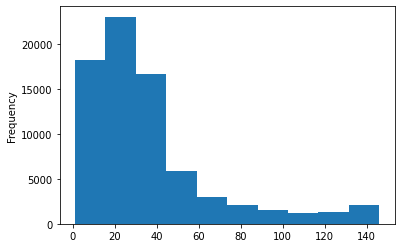

In [96]:
# len 시각화(label == 0)
import matplotlib.pyplot as plt
df[df.label == 0]['len'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

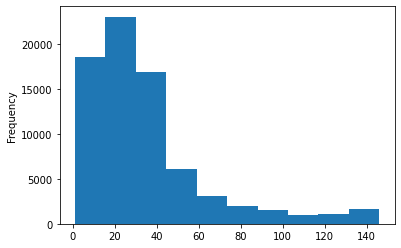

In [97]:
df.loc[df.label == 1,'len'].plot(kind = 'hist')

In [98]:
# 긍정/부정 모두 0 ~ 40 사이의 데이터가 많다.

In [99]:
# 데이터 샘플링 df[:1000]
df = df[:1000]
df.shape

(1000, 4)

In [100]:
# 토큰화
from konlpy.tag import Okt
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = Okt()
#vect = CountVectorizer(tokenizer = tokenizer.morphs)
vect = TfidfVectorizer(tokenizer = tokenizer.morphs)
vectors = vect.fit_transform(df['document'])

In [101]:
print(len(vect.vocabulary_))
print(vectors.toarray().size /1000)
#vectors.toarray()

4767
4767.0


# 머신러닝

In [106]:
print(vectors.toarray())
print(pd.DataFrame(vectors.toarray()).describe())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
              0            1            2            3            4     \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      0.010402     0.005866     0.003959     0.000738     0.000707   
std       0.052942     0.040777     0.036324     0.016701     0.022361   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.518244     0.465808     0.403690     0.427850     0.707107   

              5            6            7            8            9     ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      0.000275 

In [52]:
# 머신러닝 -> 교차검증(f1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state = 2022)
cross_val_score(model, vectors, df['label'], scoring = 'f1', cv = 5).mean()

# CountVector
# 0.6634352457852256
# TfidfVectorizer
# 0.6425121140153518

0.6425121140153518

In [54]:
vect.vocabulary_

{'아': 2638,
 '더빙': 1139,
 '..': 33,
 '진짜': 4042,
 '짜증나네요': 4067,
 '목소리': 1679,
 '흠': 4745,
 '...': 38,
 '포스터': 4396,
 '보고': 1939,
 '초딩': 4165,
 '영화': 3064,
 '줄': 3940,
 '....': 40,
 '오버': 3112,
 '연기': 3021,
 '조차': 3822,
 '가볍지': 275,
 '않구나': 2762,
 '너': 910,
 '무재': 1719,
 '밓었': 1808,
 '다그': 1020,
 '래서': 1403,
 '보는것을': 1955,
 '추천': 4191,
 '한': 4518,
 '다': 1017,
 '교도소': 539,
 '이야기': 3394,
 '구먼': 550,
 '솔직히': 2424,
 '재미': 3619,
 '는': 999,
 '없다': 2934,
 '평점': 4389,
 '조정': 3821,
 '사이': 2230,
 '몬페': 1683,
 '그': 582,
 '의': 3314,
 '익살스런': 3432,
 '가': 256,
 '돋보였던': 1177,
 '!': 0,
 '스파이더맨': 2484,
 '에서': 2972,
 '늙어': 1002,
 '보이기만': 1994,
 '했던': 4612,
 '커스틴': 4232,
 '던스트': 1143,
 '너무나도': 913,
 '이뻐': 3372,
 '보였다': 1991,
 '막': 1481,
 '걸음': 420,
 '마': 1454,
 '뗀': 1356,
 '3': 96,
 '세': 2383,
 '부터': 2101,
 '초등학교': 4164,
 '1': 58,
 '학년': 4513,
 '생인': 2320,
 '8': 114,
 '살용': 2260,
 '.': 27,
 'ㅋㅋㅋ': 228,
 '별': 1929,
 '반개': 1841,
 '도': 1155,
 '아까': 2641,
 '움': 3216,
 '원작': 3241,
 '긴장감': 680,
 '을': 3307,
 '제

## 의문점
- 토큰의 count 정보는 RandomForest 모델 학습에 사용 안됨.
- 처음 설명과 달리 단어의 출현 횟수는 무시함 

## 자연어 전처리

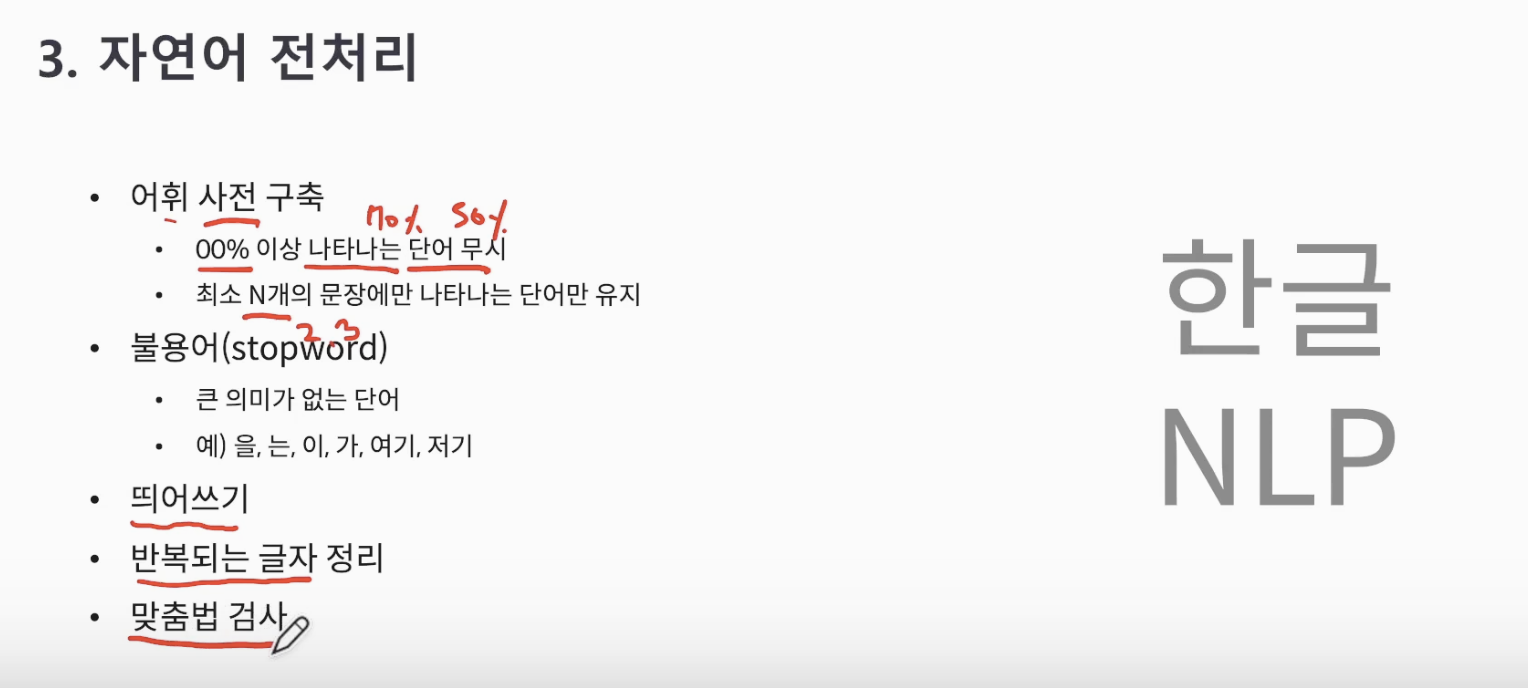

# 어휘사전 구축(max_df, min_df)

In [89]:

# 토큰화(max_df) N개보다 많은 문서에서 나타나는 단어 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, max_df = 10)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state = 2022)
cross_val_score(model, vectors, df['label'], scoring = 'accuracy', cv = 5)

array([0.665, 0.665, 0.66 , 0.62 , 0.605])

In [93]:
# 토큰화(min_df) N개보다 적은 문서에서 나타나는 단어 무시
vect = CountVectorizer(tokenizer = tokenizer.morphs, min_df = 2)
vectors = vect.fit_transform(df['document'])
model = RandomForestClassifier(random_state = 2022)
cross_val_score(model, vectors, df['label'], scoring = 'accuracy', cv = 5)

array([0.725, 0.68 , 0.685, 0.67 , 0.685])

## 불용어(stopword)


In [101]:
# stop_words
text = "함께 탐험하며 성장하는 AI 학교 AIFFEL"
stop_words = ['하며', 'ai']

words = tokenizer.morphs(text)

vect = CountVectorizer(stop_words = stop_words)
vect.fit(words)
vect.vocabulary_

{'함께': 4, '탐험': 2, '성장하는': 1, '학교': 3, 'aiffel': 0}

## 띄어쓰기

In [59]:
# py-hanspell 설치
#!pip install git+https://github.com/jungin500/py-hanspell
#!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-dl5j1wby
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-dl5j1wby
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit d1e2f93759b1bcc74b6aaa345a62c08701e5546e
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.8/511.8 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 76.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 57.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 53.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 KB 41.2 MB/s eta 0:00:00


  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2270681 sha256=1beb320986b942b9bb340a32e364c1cf4e8c137202832f30e575d6e8bae43c3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-j75a9gko/wheels/ca/f2/8d/94e29f54f44b61ffe18da21ed0199d43042bd1350f44107517
Successfully built pykospacing
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: absl-py
    Found existing installation: absl-py 0.15.0
    Uninstalling absl-py-0.15.0:
      Successfully uninstalled absl-py-0.15.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.

In [60]:
from pykospacing import Spacing
spacing = Spacing()
text = "함께탐험하며성장하는AI학교AIFFEL"
spacing(text)


'함께 탐험하며 성장하는 AI 학교 AIFFEL'

## 댓글 데이터에 반복 등장하는 이모티콘 정리

In [56]:
!pip install soynlp

In [57]:
# 댓글 데이터에 반복 등장하는 이모티콘 정리
from soynlp.normalizer import *
emoticon_normalize('하하하하핰ㅋㅋㅋㅋㅋㅋㅋ호호호호ㅠㅠㅠㅠㅠㅠ', num_repeats = 3)

'하하하ㅋㅋㅋ호호호ㅠㅠㅠ'

## 맞춤법 검사기

In [116]:
!pip install git+https://github.com/ssut/py-hanspell.git


  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-od3yqe6d
  Running command git clone --filter=blob:none --quiet https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-od3yqe6d
  Resolved https://github.com/ssut/py-hanspell.git to commit fdc6ca50c19f1c85971437a072d89d4e5ce024b8
  Preparing metadata (setup.py) ... done


In [61]:
from hanspell import spell_checker

text = '사생활치매. 안핵갈려요. 뺑손이사고. 권투를 빈다. 설흔 즈음에. 문안한 스타일. 거북암이 들다. 마음이 절여온다. 골이따분한 성격. 노력이 숲으로 돌아가다. 일해라 절해라 하지 마세요.'
spell_checker.check(text)

ModuleNotFoundError: No module named 'hanspell'

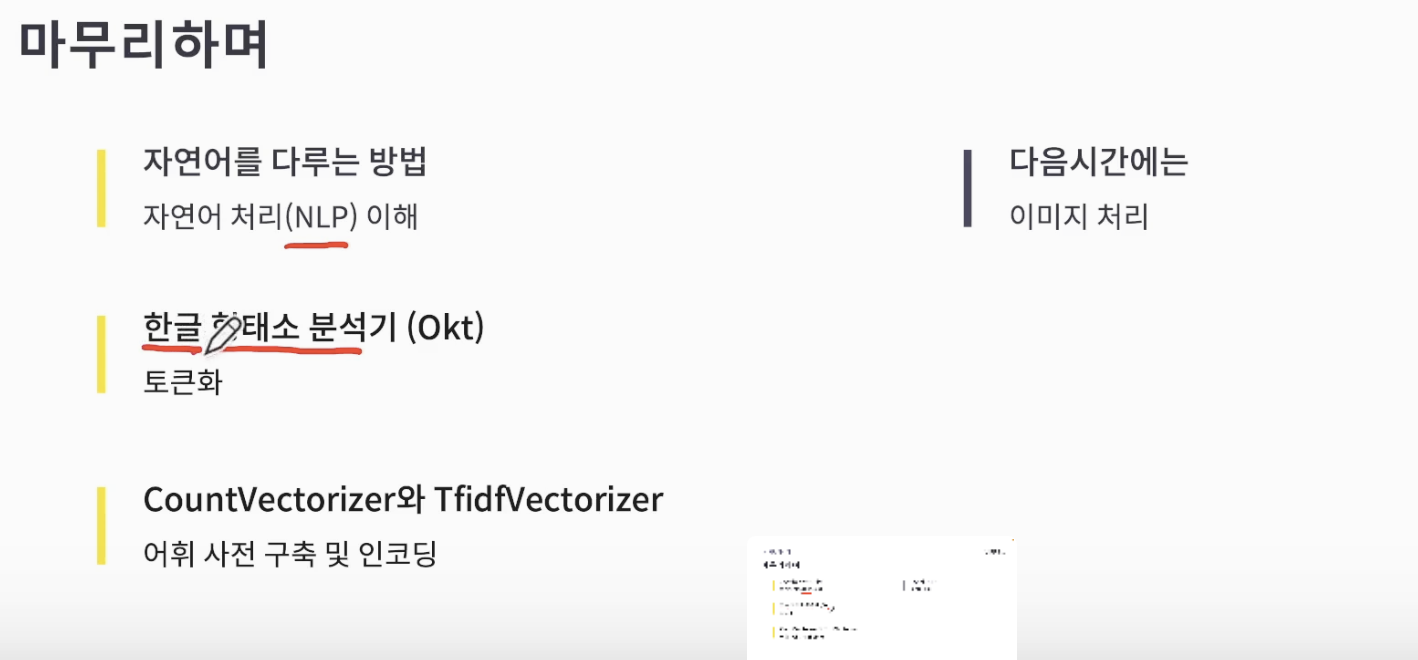

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 예제 문서 집합
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

# TfidfVectorizer 객체 생성
vectorizer = TfidfVectorizer()

# fit_transform 메서드를 사용하여 문서 집합을 TF-IDF 행렬로 변환
X = vectorizer.fit_transform(corpus)

# 어휘 사전의 단어 목록 및 TF-IDF 행렬 출력
print(vectorizer.get_feature_names())
print(X.toarray())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


In [63]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["apple apple orange", "banana apple orange"]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())


['apple', 'banana', 'orange']
[[2 0 1]
 [1 1 1]]


In [68]:
y =vectorizer.transform(['apple pineapple kiwi apple'])
y.toarray()

array([[2, 0, 0]])

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["함께 탐험하며 성장하는 AI 학교 AIFFEL"]
vectorizer = CountVectorizer(tokenizer = tokenizer.morphs)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())


['ai', 'aiffel', '성장하는', '탐험', '하며', '학교', '함께']
[[1 1 1 1 1 1 1]]


In [73]:
y =vectorizer.transform(['AI BI CI AI'])
y.toarray()

array([[2, 0, 0, 0, 0, 0, 0]])